In [13]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Generate n - dimension data for testing

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

def generate_data(n_samples=300, n_features=2, n_centers=3):
    """Generate sample data for clustering."""
    data = []
    for _ in range(n_centers):
        center = [random.uniform(-10, 10) for _ in range(n_features)]
        for _ in range(n_samples // n_centers):
            point = [c + random.gauss(0, 1) for c in center]
            data.append(point)
    return data

def initialize_centroids(data, k):
    """Initialize K centroids randomly."""
    return random.sample(data, k)

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    return clusters

def update_centroids(clusters, data):
    """Calculate new centroids based on the current clusters."""
    new_centroids = []
    for cluster in clusters:
        if cluster:  # Avoid division by zero for empty clusters
            centroid = [sum(coord) / len(cluster) for coord in zip(*cluster)]
            new_centroids.append(centroid)
        else:
            new_centroids.append(random.choice(data))  # Reinitialize empty clusters
    return new_centroids

def calculate_wcss(clusters, centroids):
    """
    Calculate the Within-Cluster Sum of Squares (WCSS).

    """

    wcss = 0.0  # Initialize WCSS to zero
    
    # Iterate over each cluster and its corresponding centroid
    for cluster, centroid in zip(clusters, centroids):
        # Iterate over each point in the cluster
        for point in cluster:
            # Calculate the squared Euclidean distance from the point to the centroid
            distance_squared = euclidean_distance(point, centroid) ** 2
            # Add the squared distance to the WCSS
            wcss += distance_squared
    
    return wcss

def kmeans(data, k, max_iterations=100):
    """Perform K-means clustering."""
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        old_centroids = centroids
        clusters = assign_clusters(data, centroids)
        centroids = update_centroids(clusters, data)
        
        if centroids == old_centroids:
            break
    
    return clusters, centroids

def elbow_method(data, max_k=10):
    """Perform elbow method to find the optimal number of clusters."""
    wcss = []
    for k in range(1, max_k + 1):
        clusters, centroids = kmeans(data, k)
        wcss.append(calculate_wcss(clusters, centroids))
    return wcss



## Let's try to plot the generated data 


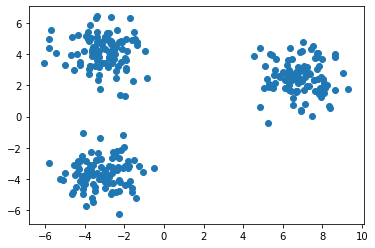

In [37]:

data = generate_data(300, 2, 3)
x = [point[0] for point in data]
y = [point[1] for point in data]
plt.scatter(x, y)


## Let's visualize the cluster after calling K means function using elbow method to find optimal K

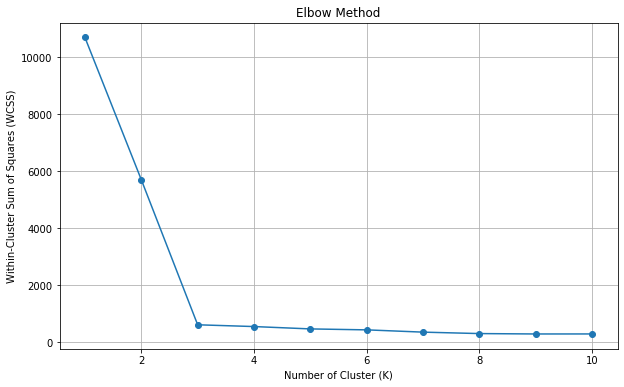

In [38]:
#Perform elbow method
max_k = 10
wcss = elbow_method(data, max_k)

#Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) +1), wcss, marker ="o")
plt.title("Elbow Method")
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

- We can see that at point K = 3, the graph curves in an elbow shape. The WCSS decrease insignificantly for K > 3
- We pick k = 3 for this data

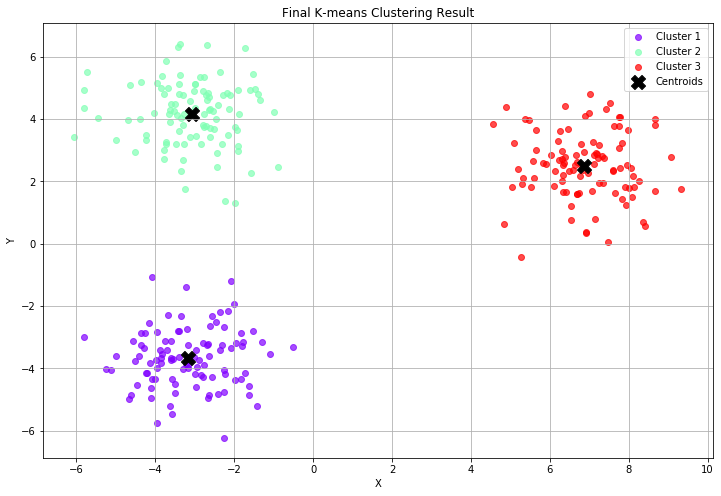

In [40]:
# Choose number of cluster
k = 3

final_clusters, final_centroids = kmeans(data, k)

plt.figure(figsize=(12, 8))

# Create a color map
colors = plt.cm.rainbow(np.linspace(0,1, len(final_clusters)))

for i, (final_clusters, color) in enumerate(zip(final_clusters, colors)):
    x = [point[0] for point in final_clusters]
    y = [point[1] for point in final_clusters]
    plt.scatter(x, y, c=[color], label=f'Cluster {i+1}', alpha=0.7)
    
# Plot centroids
centroid_x = [c[0] for c in final_centroids]
centroid_y = [c[1] for c in final_centroids]
plt.scatter(centroid_x, centroid_y, c="black", s = 200, marker= "X", label='Centroids')

plt.title("Final K_Means Clustering Result")

plt.title('Final K-means Clustering Result')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
